![image.png](attachment:image.png)

# Métodos hierárquicos de agrupamento - Tarefa

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

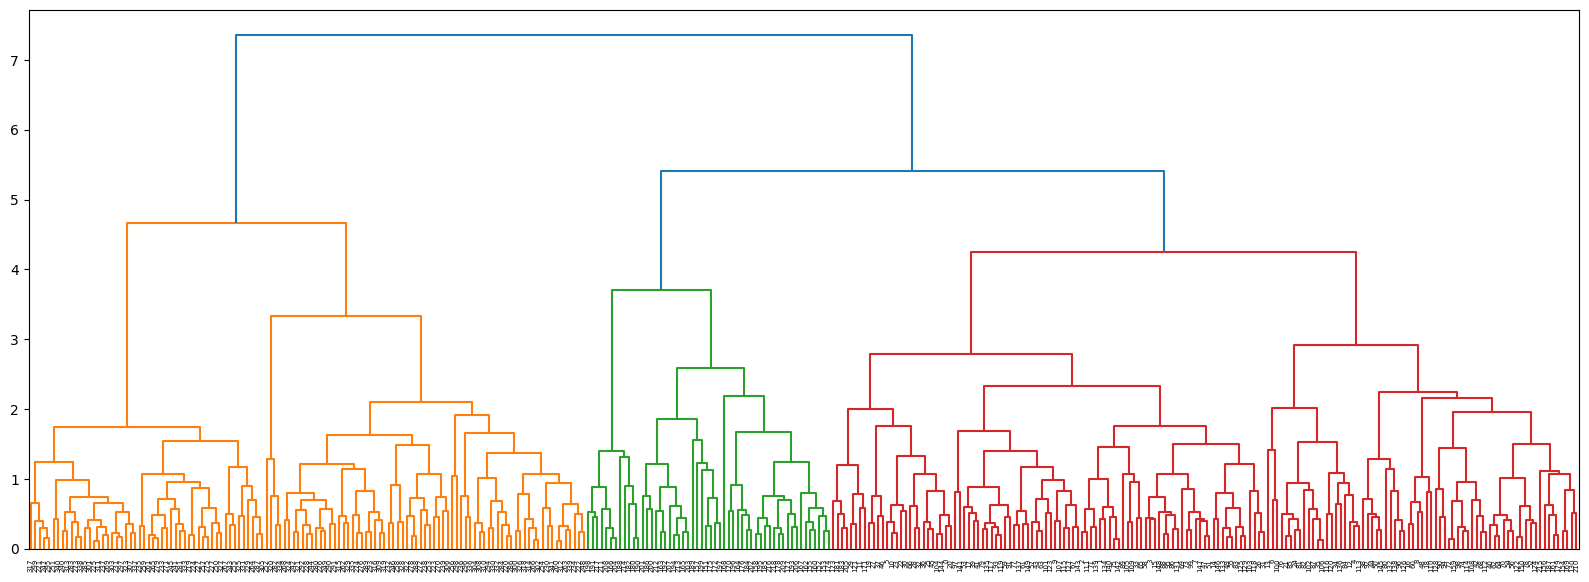

In [ ]:
# Carregando a base
peng = sns.load_dataset('penguins')
peng.index.name='id'

# Selecionando as variáveis quantitativas da base de pinguins e eliminando dados faltantes
peng_num = peng.select_dtypes(include='number').dropna()

# Padronizando as variáveis para média zero e desvio padrão 1
scaler = StandardScaler()
peng_pad = pd.DataFrame(scaler.fit_transform(peng_num), columns=peng_num.columns)

# Fazendo o agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(n_clusters=3,
                               linkage = 'complete',
                               distance_threshold=None)

clus.fit(peng_pad)

peng_pad['grupos'] = clus.labels_
peng_num['grupos'] = clus.labels_

# Fazendo o Dendrograma
plt.figure(figsize=(20, 7))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [ ]:
# Contar o número de pinguins em cada grupo
contagem_grupos = peng_pad['grupos'].value_counts().sort_index()
contagem_grupos

grupos
0    123
1    165
2     54
Name: count, dtype: int64

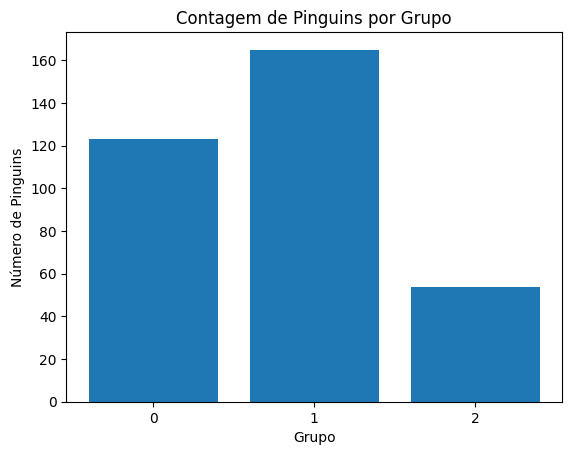

In [ ]:
# Criar um gráfico de barras com os rótulos dos grupos e a contagem de pinguins em cada grupo.
plt.bar(contagem_grupos.index, contagem_grupos.values)

# Adicionar rótulos ao eixo x e ao gráfico.
plt.xticks(contagem_grupos.index)
plt.xlabel('Grupo')

# Adicionar rótulo ao eixo y e um título ao gráfico.
plt.ylabel('Número de Pinguins')
plt.title('Contagem de Pinguins por Grupo')

# Exibir o gráfico de barras.
plt.show()

grupos       0    1   2
species                
Adelie       0  151   1
Chinstrap    1   14  53
Gentoo     122    0   0


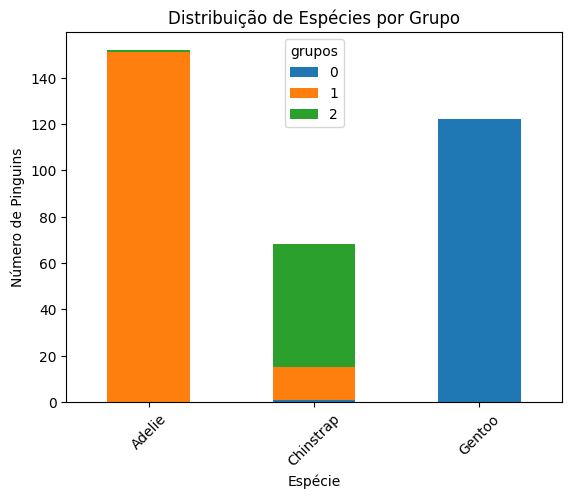

In [ ]:
# Criar uma tabela cruzada (crosstab) entre as colunas 'species' e 'grupos'
tabela_cruzada = pd.crosstab(peng['species'], peng_pad['grupos'])

# Exibir a tabela cruzada.
print(tabela_cruzada)

# Plotar a tabela cruzada como um gráfico de barras empilhadas para visualizar a distribuição de espécies em cada grupo.
ax = tabela_cruzada.plot(kind='bar', stacked=True)

# Ajustar a rotação dos rótulos no eixo x para melhorar a legibilidade.
plt.xticks(rotation=45)

ax.set_xlabel('Espécie')
ax.set_ylabel('Número de Pinguins')
ax.set_title('Distribuição de Espécies por Grupo')

# Exibir o gráfico.
plt.show()

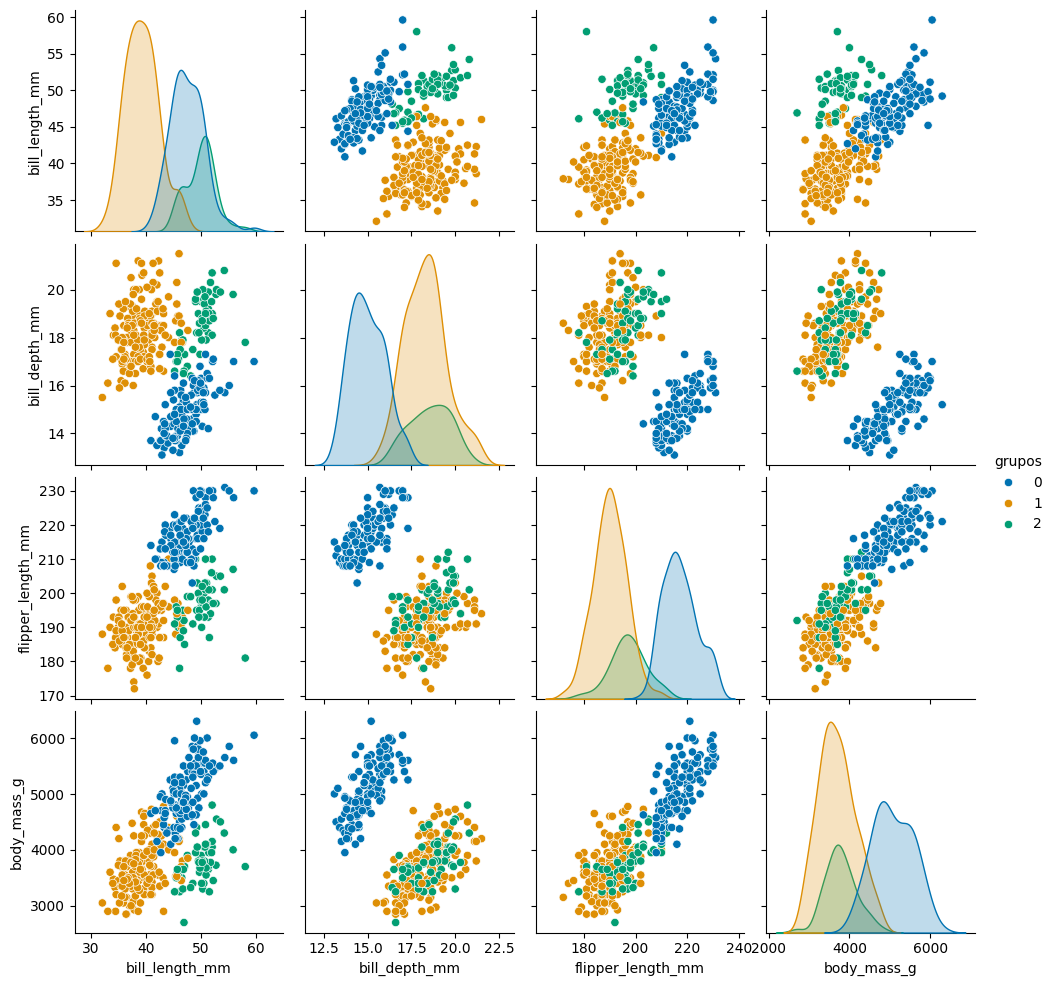

In [ ]:
# Gráfico de matriz de dispersão (pair plot) com os dados em 'peng_num'.
sns.pairplot(data=peng_num, hue='grupos', palette='colorblind')
plt.show()


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

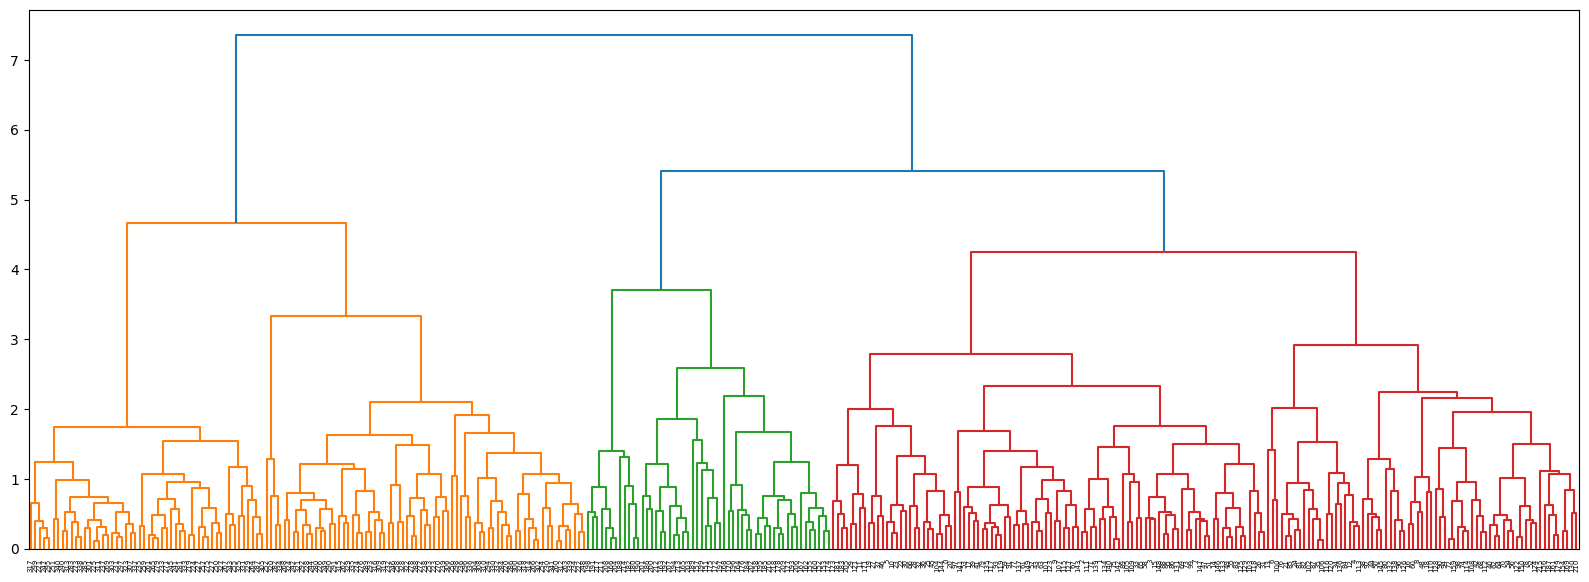

In [ ]:
# Fazendo o Dendrograma
plt.figure(figsize=(20, 7))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

In [ ]:
# Fazendo o agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(n_clusters=5,
                               linkage = 'complete',
                               distance_threshold=None)

clus.fit(peng_pad)

peng_pad['subgrupos'] = clus.labels_
peng_num['subgrupos'] = clus.labels_

peng_pad

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupos,subgrupos
0,-0.884499,0.785449,-1.418347,-0.564142,1,4
1,-0.811126,0.126188,-1.062250,-0.501703,1,4
2,-0.664380,0.430462,-0.421277,-1.188532,1,4
3,-1.324737,1.089724,-0.563715,-0.938776,1,4
4,-0.847812,1.748985,-0.777373,-0.689020,1,2
...,...,...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175,0,3
338,0.527932,-1.445897,1.003109,0.809516,0,3
339,1.188289,-0.735923,1.501644,1.933419,0,1
340,0.234440,-1.192335,0.789451,1.246590,0,3


species           Adelie  Chinstrap  Gentoo
subgrupos sex                              
0         Female       0         20       0
          Male         0         34       0
1         Female       0          0       9
          Male         0          0      61
2         Female       4          9       0
          Male        55          0       0
3         Female       0          0      49
4         Female      69          5       0
          Male        18          0       0


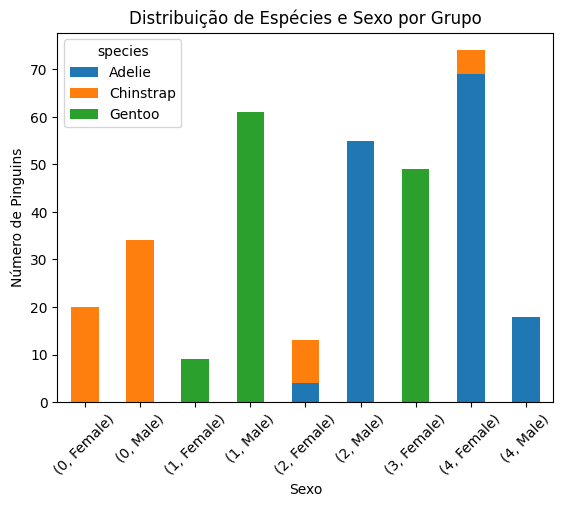

In [ ]:
contagem_subgrupos = peng_num['subgrupos'].value_counts().sort_index()
contagem_subgrupos

tabela_cruzada_ = pd.crosstab(index=[peng_num['subgrupos'], peng['sex']], columns=peng['species'])

print(tabela_cruzada_)

# Plotar a tabela cruzada como um gráfico de barras empilhadas para visualizar a distribuição de espécies em cada grupo.
ax = tabela_cruzada_.plot(kind='bar', stacked=True)

# Ajustar a rotação dos rótulos no eixo x para melhorar a legibilidade.
plt.xticks(rotation=45)

ax.set_xlabel('Sexo')
ax.set_ylabel('Número de Pinguins')
ax.set_title('Distribuição de Espécies e Sexo por Grupo')

# Exibir o gráfico.
plt.show()

Respondendo as perguntas:

* Quantos pinguins de cada espécie há em cada grupo? E quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
      Respondido abaixo na "tabela_cruzada_"


In [ ]:
tabela_cruzada_

species           Adelie  Chinstrap  Gentoo
subgrupos sex                              
0         Female       0         20       0
          Male         0         34       0
1         Female       0          0       9
          Male         0          0      61
2         Female       4          9       0
          Male        55          0       0
3         Female       0          0      49
4         Female      69          5       0
          Male        18          0       0

* Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

  Sim. Percebemos que os grupos foram bem divididos pelo sexo, tirando o grupo 0 que englobou todos os chinstrap independente do sexo. Grupo 1 predomina gentoo macho, enquanto grupo 3 predomina as fêmeas. Grupo 2 predemonina adelie macho, enquanto grupo 4 predomina adelie fêmea
